In [41]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [48]:
mx = 50; my = 50; dx=1
grid_size=np.array([mx, my])

rho_seed=3.5

tol = 0.001
x   = np.arange(0+tol, grid_size[0]-tol, 1)
y   = np.arange(0+tol, grid_size[1]-tol, 1)
r   = np.meshgrid(x,y)

distance = np.sqrt((r[0]-25)**2+(r[1]-25)**2)
rho = np.where(distance<15, rho_seed*(20-distance)/20, 0.1)
rho = rho_seed * rhoinit / np.average(rho)
rhopadded = np.pad(rho, (1, 1), 'wrap')
rhoxp1 = rhopadded[1:-1, 2:]
rhoxm1 = rhopadded[1:-1, :-2]
rhoyp1 = rhopadded[2:, 1:-1]
rhoym1 = rhopadded[0:-2, 1:-1]
rhoxp1yp1 = rhopadded[2:, 2:]

In [43]:
chi = 5

itheta = 2 * np.pi * np.random.rand(mx, my)
iS = 0.1*np.random.rand(mx, my)
Qxxinit = iS* np.cos(itheta)
Qxyinit = iS* np.sin(itheta)

In [44]:
dt = 0.1
n = 10000
T = n*dt
time = np.arange(0, T, n)

In [45]:
Qxx = np.zeros([n, mx, my])
Qxy = np.zeros([n, mx, my])
Qxx[0] = Qxxinit
Qxy[0] = Qxyinit

for i, t in enumerate(time):
    Qxx[i+1] = Qxx[i] + dt*chi*0.5*((rhoxp1+rhoxm1-2*rho) - (rhoyp1+rhoym1-2*rho))/dx**2
    Qxy[i+1] = Qxy[i] + dt*chi*(rhoxp1yp1+rho-rhoxp1-rhoyp1)/dx**2

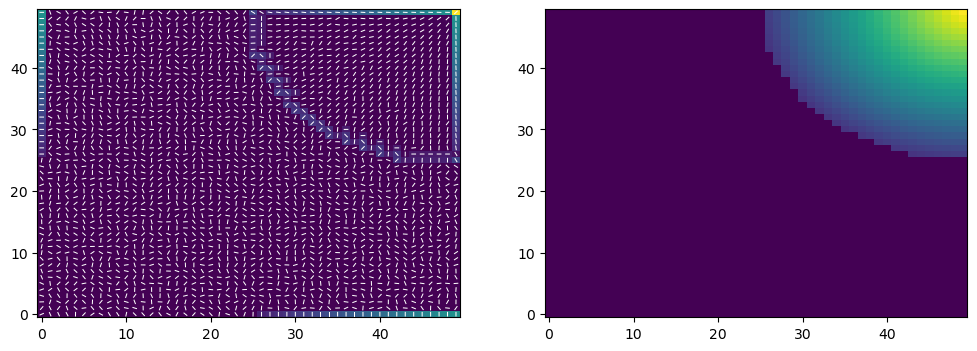

In [51]:
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)
xv, yv  = np.meshgrid(x,y)

n=1
p_factor=1

fig, ax=plt.subplots(figsize=(12,4),ncols=2)
plot1 = [ax[0].pcolormesh(xv, yv, S[n], cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[n, ::p_factor, ::p_factor],Sny[n, ::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0)]
plot2 = ax[1].pcolormesh(xv, yv, rho)
